# Introduction to Numpy powered by oneAPI

### Learning Objectives: 

- Describe why replacing inefficient code, such as time-consuming loops, wastes resources, and time
- Describe why using Python for highly repetitive small tasks is inefficient
- Describe the additive value of leveraging packages such as NumPy which are powered by oneAPI in a cloud world 
- Describe the importance of keeping oneAPI and 3rd party package such as NumPy, SciPy and others is important
- Enumerate ways in which NumPy accelerates code
- Apply loop replacement methodologies in a variety of scenarios



## To run the lab: These step could be run on a laptop - NOT REQUIRED for DevCloud!
Laptop Requirements:
 - conda config --add channels intel
 - conda install numpy
 - conda install scipy
 - conda install update pandas
 
#### Here is a list of topics we will explore in this module:
- The "WHY", Why use NumPy as replacement “for loops”?: Its FAST!
- NumPy Universal Functions or ufuncs
- NumPy Broadcasting 
- NumPy Aggregations
- NumPy Where
- NumPy Select
- A quick reference to SciPy algorithms to set the stage for the next module 


### Replacing Inefficient code
![SLowWadeWater.PNG](Assets/SlowWadeWater.png)

Code that written inefficiently:
- Be less readable (less pythonic)
- Can consume more time
- Waste energy 
- Waste purchased or leased resources


This module will focus on trying to simultaneously make code readable as well as more efficient as measured by how well we accelerate code examples. While the code example themselves are small examples, the techniques described are application in a wide variety of scenarios in AI.

### Python loops are bad for performance
**Python is great!** Its a great language for AI. There are many, many advantages in using Python especially for data science.
- Easy to program (don’t worry about data types and fussy syntax at least relative to C/C++ and other languages
- FAST for developing code!
- Leverages huge array of libraries to conquer any domain
- Lots of quick answers to common issues in Stack Exchange


#### Python, however, is slow for Massively repeating small tasks - such as found in loops! **Python loops are SLOW**

- Compared to C, C++, Fortran and other typed languages
- Python is forced to look up every occurrence and type of variable in a loop to determine what operations it can perform on that data type
- It cannot usually take advantage of advances in hardware in terms of vector width increases, multiple cores, new instructions from a new HW instruction set, new AI accelerators, effective cache memory layout, and more


#### BUT: Python has library remedies to these ills!
- Importing key libraries shift the burden of computation to highly efficient code
- NumPy, for example, through its focus on elementwise efficient operations, gives indirect access to the efficiencies afforded in "C" 
- libraries included in oneAPI and NumPy, SciPy, Scikit-learn all powered by oneAPI give access to modern advancements in hardware level: access to better cache and memory usage, access to low level vector instructions, and more.
- By leveraging packages such as these powered by oneAPI AND keeping libraries up to date, more capability is added to your underlying frameworks so that moving code, especially in a cloud world, can give you ready access to hardware acceleration, in many cases, without having to modify code this vectorized code
- Routines are written in C (based on Cython framework)
- NumPy arrays are densely packed arrays of homogeneous type. Python lists, by contrast, are arrays of pointers to objects, even when all of them are of the same type. So, you get the benefits of not having to check data types, and you also get locality of reference. Also, many NumPy operations are implemented in C, avoiding the general cost of loops in Python, pointer indirection and per-element dynamic type checking. The speed boost depends on which operations you’re performing. 

            
**Goal of this module: Search and destroy (replace) loops**

Avoid loops if you can - find an alternative if possible. Sometimes it cannot be done - true data dependencies may limit our options. But many, many time there are alternatives.


**The problem** 
- Loops isolate your code from hardware and software advances that update frequently.
- They prevent you from effectively using key underlying resources - it is a waste.
- They consume your time!


### Reference:

- [Video:  **Losing your Loops Fast Numerical Computing with NumPy** by Jake VanderPlas ](https://www.youtube.com/watch?v=EEUXKG97YRw). 

- [Book:  **Python Data Science Handbook** by Jake VanderPlas](https://jakevdp.github.io/PythonDataScienceHandbook/). 

- [Book:  **Elegant SciPy: The Art of Scientific Python** by by Juan Nunez-Iglesias, Stéfan van der Walt, Harriet Dashnow](https://www.amazon.com/Elegant-SciPy-Art-Scientific-Python/dp/1491922877)

- [Article:  **The Ultimate NumPy Tutorial for Data Science Beginners**](https://www.analyticsvidhya.com/blog/2020/04/the-ultimate-numpy-tutorial-for-data-science-beginners/) :   by Aniruddha April 28, 2020 at www.analyticsvidhya.com

- [Academic Lecture pdf: **Vectorization** by  Aaron Birkland Cornell CAC](http://www.cac.cornell.edu/education/training/StampedeJune2013/Vectorization-2013_06_18.pdf)

# Exercises:

Do a page search for each **Exercise** in this notebook. Complete all  exercises. Code in cells above each exercise may give insight into a solid approach

## Why use Numpy as replacement for loops?

## Its FAST!

In this section we will explore a smattering a different NumPy approaches that lead to accelerations over naive loops

The bigger (more iterations) of a loop the better NumPy gets and the bigger (more dimensions of data) the better NumPy gets generally.

Ultimately, we are hunting to "BIG LOOPS". What is a BIG LOOP? One that consumes a lot of time! Sometimes, even a loop with somewhat smaller iteration can be time consuming because each iteration takes long by itself. Well call these BIG LOOP too.


#### Compare different ways of computing Log10 of a larger vector

In this next section, we will create a list of 1-million random floating-point numbers. Then we will use for loop to iterate over its elements, take Log10 and store the value in another list. We'll compare the execution speed with that of a direct NumPy Log10 operation.

For this log10 problem, we will compare:

- Naive loop
- Map function
- List Comprehension
- NumPy

## Prerequisites: (Already included on Intel DevCloud)

 - conda config --add channels intel
 - conda install numpy
 - conda install scipy
 - conda install update pandas
 
#### Import updated libraries

In [1]:

import numpy as np
from math import log10 as lg10
import time
import matplotlib.pyplot as plt
import random
%matplotlib inline

np.__version__

'1.21.4'

## Show Numpy configs

Look to ensure Intel MKL or oneAPI is part of your configuration using show_config

In [2]:
import numpy as np
np.show_config() 

blas_mkl_info:
    libraries = ['mkl_rt', 'pthread']
    library_dirs = ['/glob/development-tools/versions/oneapi/2022.3.1/oneapi/intelpython/latest/lib']
    define_macros = [('SCIPY_MKL_H', None), ('HAVE_CBLAS', None)]
    include_dirs = ['/glob/development-tools/versions/oneapi/2022.3.1/oneapi/intelpython/latest/include']
blas_opt_info:
    libraries = ['mkl_rt', 'pthread']
    library_dirs = ['/glob/development-tools/versions/oneapi/2022.3.1/oneapi/intelpython/latest/lib']
    define_macros = [('SCIPY_MKL_H', None), ('HAVE_CBLAS', None)]
    include_dirs = ['/glob/development-tools/versions/oneapi/2022.3.1/oneapi/intelpython/latest/include']
lapack_mkl_info:
    libraries = ['mkl_rt', 'pthread']
    library_dirs = ['/glob/development-tools/versions/oneapi/2022.3.1/oneapi/intelpython/latest/lib']
    define_macros = [('SCIPY_MKL_H', None), ('HAVE_CBLAS', None)]
    include_dirs = ['/glob/development-tools/versions/oneapi/2022.3.1/oneapi/intelpython/latest/include']
lapack_opt_info:


#### Create a list of 1 million numbers

In [3]:
N = 100_000_000 # Number of records to process
L = list(100*(np.random.random(N))+1)

#### Create a NumPy ndarray object from that list

This is the first step towards vectorization

In [4]:
a1 = np.array(L)

#### Create an empty NumPy ndarray object 

In [5]:
np.empty([N, 2])

# or

np.ndarray(shape=(N,2), dtype=float)

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       ...,
       [0., 0.],
       [0., 0.],
       [0., 0.]])

#### Create zero filled NumPy ndarray object 

In [6]:
np.zeros([N, 2])

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       ...,
       [0., 0.],
       [0., 0.],
       [0., 0.]])

#### Create NumPy ndarray object filled with ones

In [7]:
np.ones([N, 2])

array([[1., 1.],
       [1., 1.],
       [1., 1.],
       ...,
       [1., 1.],
       [1., 1.],
       [1., 1.]])

#### Create Identity Matrix of given size

In [8]:
np.eye(100)

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

# Appending using NumPy

Appending is easy in NumPy

Simply use np.append() as in the below example:

```python
np.append(a, [7,8,9]) 
```

### Caveat: Append With NumPy.

Appending process does not occur in the same array. Rather a new array is created and filled.

### With Python.

Things are very different. The list filling process stays within the list itself, and no new lists are generated.

### One Solution: Change your mindset!

The goal is not to find a replacement for **append()**!

The goal is to find a replacement for the **loop**

Replace loop with linspace and ufuncs...??? It will depend on your specific loop

##### Get rid of loop at all costs

In [9]:
a = []
t1=time.time()
timing = {}
for i in range(10_000):
    a.append(np.sin(i))
t2 = time.time()
print("With for loop and appending it took {} seconds".format(t2-t1))
timing['loop'] = (t2-t1)
a[:5]

With for loop and appending it took 0.014294624328613281 seconds


[0.0,
 0.8414709848078965,
 0.9092974268256817,
 0.1411200080598672,
 -0.7568024953079282]

In [10]:
a = np.array([])
t1=time.time()
for i in range(10_000):
    a = np.append(a, np.sin(i))
t2 = time.time()
print("With for loop and appending it took {} seconds".format(t2-t1))
timing['numpy'] = (t2-t1)
a[:5]

With for loop and appending it took 0.07790637016296387 seconds


array([ 0.        ,  0.84147098,  0.90929743,  0.14112001, -0.7568025 ])

# Below we replaced the entire loop from above

We avoided simple replacement of per row np.append()

In [11]:
a = np.linspace(0, 10_000_000, num=10_000_000 + 1)
t1=time.time()
a = np.sin(a)
t2 = time.time()
print("With linspace and ufunc it took {} seconds for WAY MORE values!".format(t2-t1))
timing['numpy'] = (t2-t1)
a[:5]

With linspace and ufunc it took 0.035422563552856445 seconds for WAY MORE values!


array([ 0.        ,  0.84147098,  0.90929743,  0.14112001, -0.7568025 ])

# Time a *Naive* For loop computing Log

This one has a somewhat expensive **log10 function** that is being called on each element

We append the results to the list

In [12]:
# Create a blank list for appending elements

timing = {} # Just a blank dictionary to append to

t1=time.time()
l2 = []
for item in L:
    l2.append(lg10(item))
t2 = time.time()
print("With for loop and appending it took {} seconds".format(t2-t1))
timing['loop'] = (t2-t1)
print("First few elements of the resulting array:", l2[:4])

With for loop and appending it took 13.762109756469727 seconds
First few elements of the resulting array: [1.8980088704892872, 1.4650689211514467, 1.3235806447061125, 1.5903575135191153]


# Time the *Map* function

One Python alternative to looping is the **map function** that applies a function to each element in a list

In [13]:
def op1(x):
    return (lg10(x))

t1=time.time()

l2=list(map(op1,L))

t2 = time.time()
print("With list(map) functional method it took {} seconds".format(t2-t1))
timing['map'] = (t2-t1)
print("First few elements of the resulting array:", l2[:4])

With list(map) functional method it took 11.767843246459961 seconds
First few elements of the resulting array: [1.8980088704892872, 1.4650689211514467, 1.3235806447061125, 1.5903575135191153]


# Time a *List comprehension*

One very popular Python alternative to use a list comprehension instead of the loop

In [14]:
t1=time.time()
l2 = [lg10(i+1) for i in range(len(L))]
t2 = time.time()
print("With list comprehension, it took {} seconds".format(t2-t1))
timing['list comprehension'] = (t2-t1)
print("First few elements of the resulting array:", l2[:4])

With list comprehension, it took 11.980946779251099 seconds
First few elements of the resulting array: [0.0, 0.3010299956639812, 0.47712125471966244, 0.6020599913279624]


# Time *NumPy operation* (vectorized array)

- Exercise: replace ReplaceThisBrokenCode with:
```python
a2=np.log10(a1)
```

In [15]:
t1=time.time()
# Notice that we assume we already converted the list to numpy 
# otherwise we should include that time as well
####### Insert corrected code below

a2=np.log10(a1)

##################################

t2 = time.time()
print("With direct NumPy log10 method it took {} seconds".format(t2-t1))
timing['numpy'] = (t2-t1)

print("First few elements of the resulting array:", a2[:4])

With direct NumPy log10 method it took 0.07852053642272949 seconds
First few elements of the resulting array: [1.89800887 1.46506892 1.32358064 1.59035751]


### Plot the time taken by each operation

Acceleration :  175 X


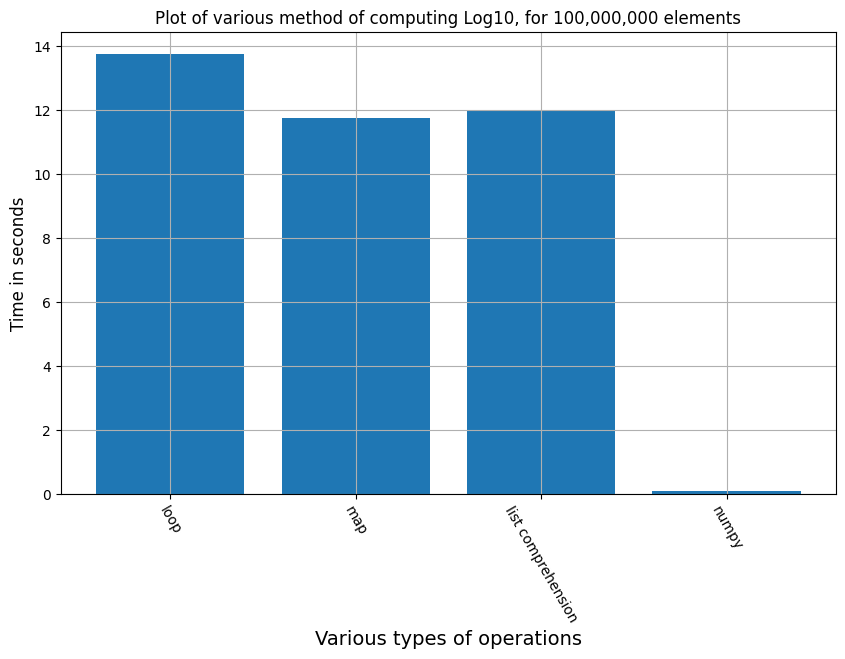

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.title("Plot of various method of computing Log10, for {:,} elements".format(a1.shape[0]))
plt.ylabel("Time in seconds",fontsize=12)
plt.xlabel("Various types of operations",fontsize=14)
plt.xticks(rotation=-60)
plt.grid(True)
plt.bar(x = range(len(timing)), height=list(timing.values()), align='center', tick_label=list(timing.keys()))
print('Acceleration : {:4.0f} X'.format(timing['loop']/timing['numpy']))

We see the evidence that NumPy operations over ndarray objects are much faster than regular Python math operations. The exact speed of regular Python operations vary a little but they are almost always much slower compared to the vectorized NumPy operation. This is primarily due to memory layout and having to interpret datatypes in every iteration

# Shift a vector - Time Series Prediction Task

In AI, we often need to shift data. For example, in time series prediction we typically want to predict a later value in a time sequence, given earlier available feature data. We often select a target variable that is time shifted to predict later labels in time.

Suppose we want to take a vector, a column of numbers, and shift them by a constant. Append the last element of the list to be zero.

Naive approach with for loop **b[i] = a[i+1]**

In [17]:
# try naive loop
num = 100_000_001
a = np.linspace(0, num - 1, num=num)
b = np.ndarray(num-1)

timing = {}

t1=time.time()

for i in range(len(a)-1):
    b[i] = a[i+1]

t2=time.time()
print("shift b w loop {} secs".format(t2-t1))
timing['loop'] = (t2-t1)
b[:2], b[-2:]

shift b w loop 22.66619324684143 secs


(array([1., 2.]), array([9.9999999e+07, 1.0000000e+08]))

List comprehensions are generally faster than explicit "for loops"

In [18]:
# try list comprehension 
t1=time.time()

b = [a[i+1] for i in range(len(a)-1)] # shift b by 1

t2=time.time()
print("shift b {} secs".format(t2-t1))
timing['list comprehension'] = (t2-t1)
b[:2], b[-2:]

shift b 13.788261651992798 secs


([1.0, 2.0], [99999999.0, 100000000.0])

Use Numpy ufuncs such as roll and delete

```python
b = np.delete( np.roll(a,-1) , -1)
```

In [19]:
# try ufunc np.roll
t1=time.time()

b = np.delete( np.roll(a,-1) , -1)  # numpy roll and delete last value

t2=time.time()
print("shift b {} secs".format(t2-t1))
timing['RollDelete'] = (t2-t1)
b[:2], b[-2:]

shift b 1.582360029220581 secs


(array([1., 2.]), array([9.9999999e+07, 1.0000000e+08]))

Use fancy slicing

- Exercise: replace ReplaceThisBrokenCode with:
```python
b = a[1:]
```

In [20]:
# try fancy slicing
t1=time.time()
####### Insert corrected code below

b = a[1:]

##################################

t2=time.time()
print("shift b {} secs".format(t2-t1))
timing['slicing'] = (t2-t1)
b[:2], b[-2:]

shift b 3.8623809814453125e-05 secs


(array([1., 2.]), array([9.9999999e+07, 1.0000000e+08]))

Plot the results

Acceleration : 6e+05 X


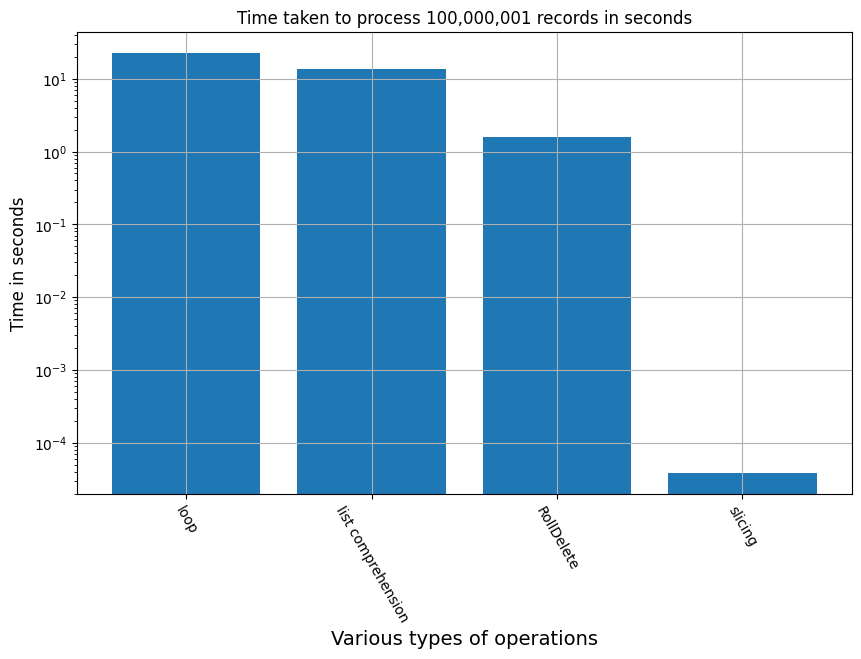

In [21]:
plt.figure(figsize=(10,6))
plt.title("Time taken to process {:,} records in seconds".format(num),fontsize=12)
plt.ylabel("Time in seconds",fontsize=12)
plt.yscale('log')
plt.xlabel("Various types of operations",fontsize=14)
plt.grid(True)
plt.xticks(rotation=-60)
plt.bar(x = list(timing.keys()), height= list(timing.values()), align='center',tick_label=list(timing.keys()))
print('Acceleration : {:4.0g} X'.format(timing['loop']/(timing['slicing'])))

In [22]:
print("Done!")

Done!
